In [1]:
#!pip install ortools==9.0.9048
#!pip install pandas==1.2.4

import pandas as pd
import seaborn as sns

from stratified_k_means_constrained import StratifiedKMeansConstrained
from k_means_constrained import KMeansConstrained


In [2]:
# LOAD EXAMPLE DATA

In [3]:
df = pd.read_csv('example.csv', delimiter=';')
df = df[df['Latitude']!='#']
df['Latitude'] = df['Latitude'].astype('float32')
df['Longitude'] = df['Longitude'].astype('float32')
df = df.reset_index().drop(columns='index')

df2 = df.copy()
df_tmp = df.copy()

In [4]:
df.head()

,Account,Area,Kontakt,Kontakt 2,Latitude,Longitude,Segment,Licznik
0,24,OBSZAR 1,KONTAKT BRAK,KONTAKT BRAK,53.380131,22.154110,4,1
1,118,OBSZAR 1,KONTAKT 2,KONTAKT BRAK,52.989388,22.887564,3,1
2,119,OBSZAR 1,KONTAKT BRAK,KONTAKT BRAK,52.984379,22.887905,3,1
3,120,OBSZAR 1,KONTAKT 3,KONTAKT BRAK,53.393509,23.470776,2,1
4,127,OBSZAR 1,KONTAKT 4,KONTAKT BRAK,53.042900,23.373030,4,1


In [5]:
# CURRENT ASSIGMENT TO KONTAKT
df['Kontakt'].value_counts()

KONTAKT BRAK    1393
KONTAKT 7        120
KONTAKT 4        119
KONTAKT 5        119
KONTAKT 3        118
KONTAKT 2        109
KONTAKT 8        106
KONTAKT 6        106
KONTAKT 9         32
Name: Kontakt, dtype: int64

In [6]:
# CLUSTERING WITH CLUSTER SIZE AS PARAMETER

# PARAMS OF CLUSTERING METHOD
clf_tmp = KMeansConstrained(n_clusters=5,       # clusters
                        size_min=1,         # min cluster size
                        size_max=2222,        # max cluster size
                        n_init=10,          # init time
                        max_iter=5,       # max iteration num
                        tol=0.0001,         # stop for centroids change
                        random_state=None,  # random seed for first iteration
                        copy_x=True,        # work on data copy
                        n_jobs=-1)          # jobs number

# CLUSTERING PROCES
labels = clf_tmp.fit_predict(df_tmp[['Latitude','Longitude']])
labels = pd.DataFrame(labels, columns=['cluster'])

# RESULTS
df_tmp = pd.concat([df_tmp, labels], axis=1)

In [18]:
pd.pivot_table(data=df_tmp, index='Segment', columns='cluster', values='Licznik', 
               aggfunc='sum', margins=True, fill_value=0)

cluster,0,1,2,3,4,All
Segment,,,,,,
1,101,125,115,1,227,569
2,88,115,96,2,241,542
3,68,128,118,0,244,558
4,82,116,122,0,233,553
All,339,484,451,3,945,2222


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

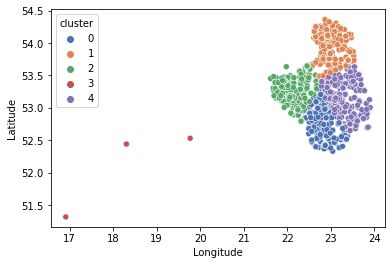

In [16]:
sns.scatterplot(y='Latitude', x='Longitude', data=df_tmp, hue='cluster', palette="deep")

# Example 1:

Create nine clusters with the same size with coordinates as variables

In [8]:
# CLUSTERING WITH CLUSTER SIZE AS PARAMETER

# PARAMS OF CLUSTERING METHOD
clf = KMeansConstrained(n_clusters=5,       # clusters
                        size_min=440,         # min cluster size
                        size_max=450,        # max cluster size
                        n_init=10,          # init time
                        max_iter=5,       # max iteration num
                        tol=0.0001,         # stop for centroids change
                        random_state=None,  # random seed for first iteration
                        copy_x=True,        # work on data copy
                        n_jobs=-1)          # jobs number

# CLUSTERING PROCES
labels = clf.fit_predict(df[['Latitude','Longitude']])
labels = pd.DataFrame(labels, columns=['cluster'])

# RESULTS
df = pd.concat([df, labels], axis=1)

In [9]:
pd.pivot_table(data=df, index='Segment', columns='cluster', values='Licznik', aggfunc='sum', margins=True)

cluster,0,1,2,3,4,All
Segment,,,,,,
1,111,113,113,126,106,569
2,113,94,110,121,104,542
3,120,117,116,88,117,558
4,106,118,111,105,113,553
All,450,442,450,440,440,2222


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

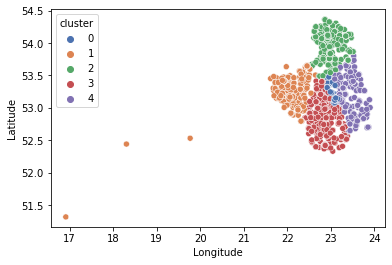

In [10]:
sns.scatterplot(y='Latitude', x='Longitude', data=df, hue='cluster', palette="deep")

# Example 2

Create nine clusters with the same size with coordinates as variables,
Codnition, each cluster must contains the same structure of 'Segment' 

In [11]:
# CLUSTERING WITH CLUSTER SIZE AS PARAMETER WITH AND STRATIFY DATA
clf2 = StratifiedKMeansConstrained(n_clusters=5,       # clusters
                        size_min=440,                 # min cluster size
                        size_max=450,                 # max cluster size
                        n_init=100,                    # init time
                        max_iter=5,                   # max iteration num
                        tol=0.0001,                   # stop for centroids change
                        random_state=None,            # random seed for first iteration
                        copy_x=True,                  # work on data copy
                        n_jobs=-1)                    # jobs number


In [12]:
# CLUSTERING PROCESS
labels = clf2.fit_predict(df2[['Latitude','Longitude']], stratifying_var = df2['Segment'])
labels = pd.DataFrame(labels, columns=['strat_cluster'])

# RESULTS
df2 = pd.concat([df2, labels], axis=1)

In [13]:
pd.pivot_table(data=df2, index='Segment', columns='strat_cluster', values='Licznik', aggfunc='sum', margins=True)

strat_cluster,0,1,2,3,4,All
Segment,,,,,,
1,114,114,114,113,114,569
2,109,109,109,106,109,542
3,112,110,112,112,112,558
4,111,109,111,111,111,553
All,446,442,446,442,446,2222


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

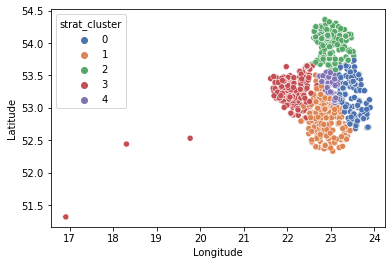

In [14]:
sns.scatterplot(y='Latitude', x='Longitude', data=df2, hue='strat_cluster', palette="deep")